In [1]:
# Parameters
current_time = "20_3_2022__18_23_3"
batch_id = 5
source_data = ".//data//source//Grocery, Fruits and Dry Fruits.csv"
source_notebook = ".//notebooks//input//Grocery_Data_Preprocessing.ipynb"
preprocessed_data = ".//data//processed//20_3_2022__18_23_3_Grocery, Fruits and Dry Fruits.csv"
unprocessed_data = ".//data//unprocessed//20_3_2022__18_23_3_unprocessed_Grocery, Fruits and Dry Fruits.csv"


# Reading the data into python

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
import pandas as pd
import numpy as np


inventory_df = pd.read_csv(open(source_data))
inventory_df.sample(5)

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
14600,Beauty Hygiene,Bath Face Hand Wash,Groceries,Nivea,Lemon & Oil Shower Gel - Pampering Care With R...,250 ml,225.0,202226601.0,https://www.bigbasket.com/media/uploads/p/s/29...,4.5,39
11335,Gourmet World Food,Drinks Beverages,Groceries,Monin,Syrup - Vanille Flavored,250 ml Bottle,395.0,202223336.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.5,25
5386,Kitchen Garden Pets,Gardening,Groceries,Eco,Ready To Pot - Natural Fertilizer And Soil In ...,20 kg Pouch,735.0,202217387.0,https://www.bigbasket.com/media/uploads/p/s/40...,5.0,36
5265,Cleaning Household,Disposables Garbage Bag,Groceries,Ciphands,Germ Protection Wipes,40 pcs,140.0,202217266.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.8,91
14017,Snacks Branded Foods,Chocolates Candies,Groceries,Cadbury,Chocolate Bar - Fuse,2x27.5 g Multipack,40.0,202226018.0,https://www.bigbasket.com/media/uploads/p/s/12...,4.3,59


In [4]:
print('Shape before deleting duplicate values:', inventory_df.shape)

# Removing duplicate rows if any
inventory_df = inventory_df.drop_duplicates()
print('Shape After deleting duplicate values:', inventory_df.shape)

# Printing sample data
inventory_df.sample(5)

Shape before deleting duplicate values: (17609, 11)
Shape After deleting duplicate values: (17609, 11)


,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
785,Foodgrains Oil Masala,Flours Sooji,Groceries,BB Royal,"Basmati Rice - Mogra, Broken/Tukda 5 Kg + Whea...",Combo 2 Pcs,880.0,202212786.0,https://www.bigbasket.com/media/uploads/p/s/12...,4.8,29
1706,Beauty Hygiene,Makeup,Groceries,Gala Of London,"Classic Sindoor - Rich & Long-Lasting Colour, ...",7 ml 01 Red,110.0,202213707.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.0,44
615,Snacks Branded Foods,Breakfast Cereals,Groceries,Timios,"Breakfast Cereals - Crunchies, 100% Natural & ...",300 g,160.0,202212616.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.9,27
16576,Gourmet World Food,Oils Vinegar,Groceries,BORGES,Olive Oil - Classic,250 ml,375.0,202228577.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.9,32
5178,Beauty Hygiene,Health Medicine,Groceries,Kare In,Kare in Adult Under Pads Large,10 Pcs Pouch,299.0,202217179.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.3,71


# Defining the problem statement

#### Create a predictive model which gives relevant products recommendations

Predictors: Category, Sub Category, Brand Name, Product Rating, Name

# Basic Data Exploration

In [5]:
# Looking at the sample rows in the data
inventory_df.sample(5)

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
17122,Kitchen Garden Pets,Crockery Cutlery,Groceries,BB Home,"Steel Table Knife - Classic Jazz Series, BBCL15",2 pcs,199.0,202229123.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.5,55
8567,Kitchen Garden Pets,Pet Food Accessories,Groceries,Whiskas,"Adult Wet Cat Food - Super Saver Pack, 1+ Year...",85 g Pack of 48,1680.0,202220568.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.2,64
13207,Kitchen Garden Pets,Pet Food Accessories,Groceries,Himalaya Pet Care,Scavon - Vet Spray,100 ml,150.0,202225208.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.7,53
12630,Kitchen Garden Pets,Bakeware,Groceries,Casasunco,"Silicon Spatula - Wooden Handle, Blue/Grey - F...",1 pc,339.0,202224631.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.8,96
2594,Snacks Branded Foods,Spreads Sauces Ketchup,Groceries,La Vieja Fabrica,Spread - Peach,350 g,340.0,202214595.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.1,49


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17609 entries, 0 to 17608
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Category               17609 non-null  object 
 1   Sub Category           17609 non-null  object 
 2   Simplified Category    17609 non-null  object 
 3   Brand Name             17608 non-null  object 
 4   Product Name           17609 non-null  object 
 5   Weight                 17609 non-null  object 
 6   MRP/Unit               17609 non-null  float64
 7   Product ID             17609 non-null  float64
 8   Image URL              17609 non-null  object 
 9   Rating                 17609 non-null  float64
 10  No of Users Purchased  17609 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 1.6+ MB


In [7]:
# Looking at the descriptive statistics of the data
inventory_df.describe(include='all')

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
count,17609,17609,17609,17608,17609,17609,17609.000000,1.760900e+04,17609,17609.000000,17609.000000
unique,10,89,4,1510,11059,2909,NaN,NaN,12073,NaN,NaN
top,Gourmet World Food,Spreads Sauces Ketchup,Groceries,Fresho,Soft Drink,1 pc,NaN,NaN,https://www.bbassets.com/static/images/product...,NaN,NaN
freq,2657,432,16925,941,23,1227,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,348.130872,2.136807e+08,NaN,4.501477,62.471691
std,NaN,NaN,NaN,NaN,NaN,NaN,521.612084,1.520719e+09,NaN,0.291768,21.989370
min,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.022120e+08,NaN,4.000000,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,2.022164e+08,NaN,4.300000,43.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,199.000000,2.022208e+08,NaN,4.500000,63.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,399.000000,2.022252e+08,NaN,4.700000,81.000000


In [8]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
inventory_df.nunique()

Category                    10
Sub Category                89
Simplified Category          4
Brand Name                1510
Product Name             11059
Weight                    2909
MRP/Unit                  1090
Product ID               17608
Image URL                12073
Rating                      11
No of Users Purchased       76
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration above, we can create a simple report of the data, noting down the observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created.

- Category     : Selected. Categorical.
- Sub Category : Selected. Categorical.
- Brand Name   : Selected. Categorical.
- Product Name: Selected. Categorical.
- Name         : Selected. Categorical.
- Weight       : Selected. Continuous.
- MRP/Unit     : Selected. Continuous.
- Qnty         : Selected. Continuous.
- Unit Qnty    : Selected. Continuous.
- Cost Price   : Selected. Continuous.
- Product ID   : Selected. Continuous.
- Product rating : Selected. Continuous.

# Visual Exploratory Data Analysis

Categorical variables: Bar plot

Continuous variables: Histogram

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

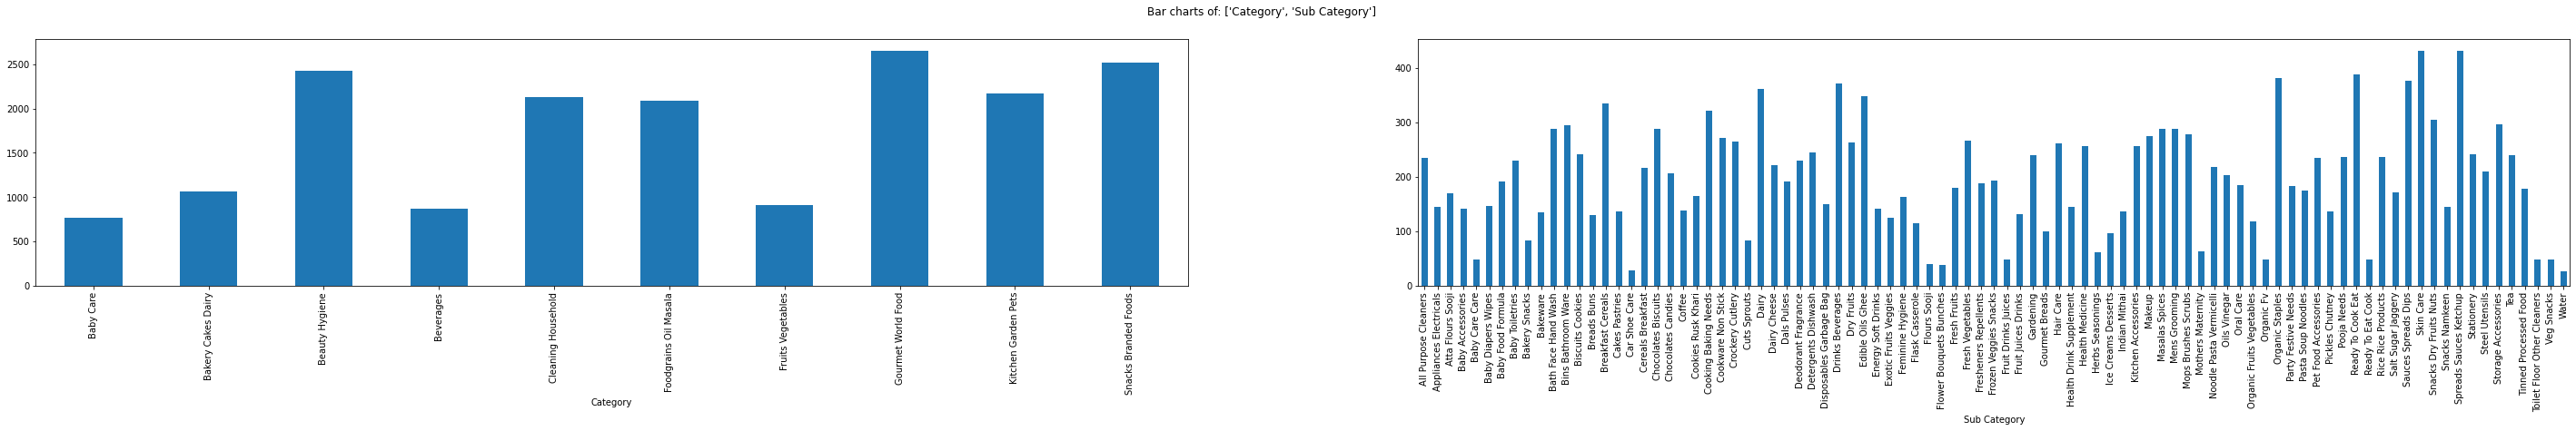

In [10]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=inventory_df, 
              colsToPlot=['Category', 'Sub Category'])

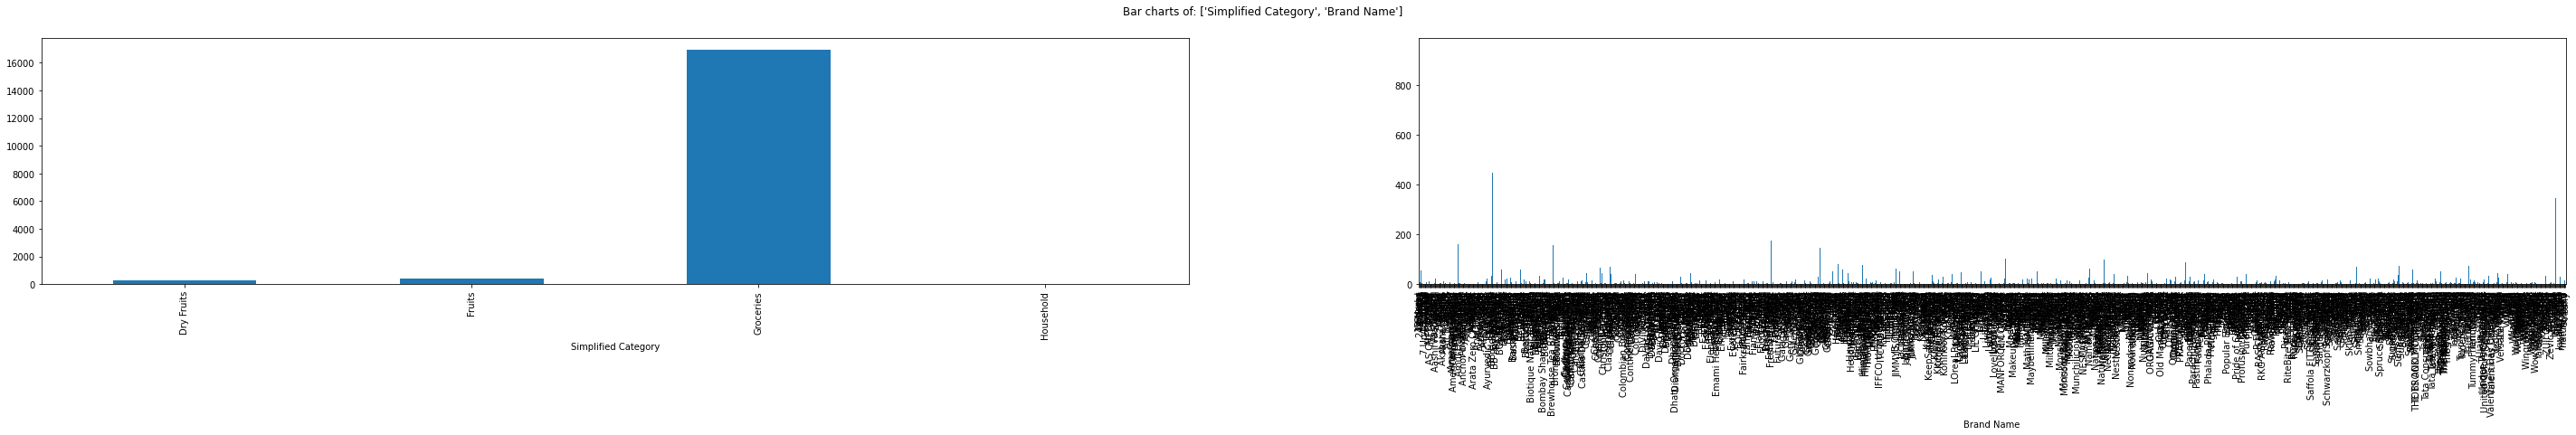

In [11]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=inventory_df, 
              colsToPlot=['Simplified Category', 'Brand Name'])

# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In this data, all the categorical columns except "Brand Name", "Name" and "Product Name" have satisfactory distribution for machine learning.

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'MRP/Unit'}>,
        <AxesSubplot:title={'center':'Rating '}>],
       [<AxesSubplot:title={'center':'No of Users Purchased'}>,
        <AxesSubplot:>]], dtype=object)

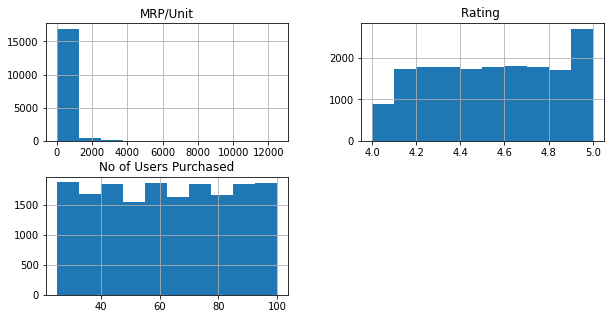

In [12]:
# Plotting histograms of multiple columns together

inventory_df.hist(['MRP/Unit', 'Rating ', 'No of Users Purchased'], figsize=(10, 5))

In [13]:
inventory_df.columns

Index(['Category', 'Sub Category', 'Simplified Category', 'Brand Name',
       'Product Name', 'Weight', 'MRP/Unit', 'Product ID ', 'Image URL',
       'Rating ', 'No of Users Purchased'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Product ID '}>]], dtype=object)

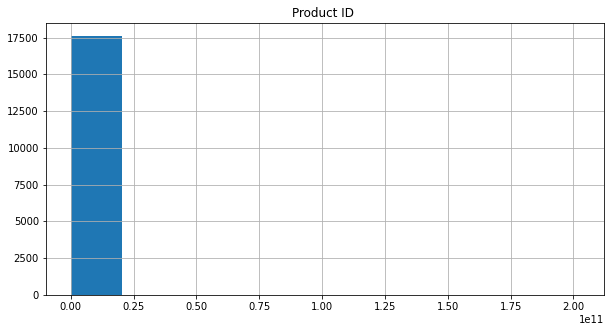

In [14]:
# Plotting histograms of multiple columns together

inventory_df.hist(['Product ID '], figsize=(10,5))

# Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

- MRP/Unit   : Selected. Slightly skewed distribution, acceptable.
- Qnty       : Selected. Slightly skewed distribution, acceptable.
- Unit Qnty  : Selected. Skewed distribution, not acceptable.
- Cost Price : Selected. Slightly skewed distribution, acceptable.


# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the outlier values with a logical business value

In this data all the continuous variables have slightly skewed distribution, which is acceptable, hence no outlier treatment is required.




1. Rating <0 and >5 
2. simplfied category not in 'Groceries' ,'Fruits' ,'Dry Fruits'
3. Length of productid >12
4. MRP/Unit <0 and MRP/Unit>10000

In [15]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [16]:
lowerbound,upperbound = outlier_treatment(inventory_df['Rating '])

In [17]:
# Records not within the boundary
inventory_df[(inventory_df['Rating '] < lowerbound) | (inventory_df['Rating '] > upperbound)]

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased


In [18]:
error_records_df = inventory_df[(inventory_df['Rating '] < lowerbound) | (inventory_df['Rating '] > upperbound)]
error_records_df.drop(['Sub Category', 'Brand Name', 'No of Users Purchased'], axis=1, inplace=True)
error_records_df.rename(columns = {'Category':'Sub_Category_Name', 'Simplified Category':'Category_Name','Product Name':'Product_Name', 'MRP/Unit':'Price','Product ID ':'productid', 'Image URL':'Image', 'Rating ':'Product_Rating'}, inplace= True)
error_records_df.to_csv(unprocessed_data, index=False)

In [19]:
# simplfied category not in 'Groceries' ,'Fruits' ,'Dry Fruits'
inventory_df[(inventory_df['Simplified Category'] != 'Groceries') & (inventory_df['Simplified Category'] != 'Fruits') & (inventory_df['Simplified Category'] != 'Dry Fruits')]

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
17607,Gourmet World Food,Dairy Cheese,Household,ORGANIC ORIGINS,Butter - Almond Cacao Crunchy,200 g,590.0,202229607.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.6,95


In [20]:
error_records_df =inventory_df[(inventory_df['Simplified Category'] != 'Groceries') & (inventory_df['Simplified Category'] != 'Fruits') & (inventory_df['Simplified Category'] != 'Dry Fruits')]
error_records_df.rename(columns = {'Category':'Sub_Category_Name', 'Simplified Category':'Category_Name','Product Name':'Product_Name', 'MRP/Unit':'Price','Product ID ':'productid', 'Image URL':'Image', 'Rating ':'Product_Rating'}, inplace= True)
error_records_df.to_csv(unprocessed_data, mode='a', index=False, header=False)

In [21]:
# Length of productid > 12
inventory_df[inventory_df['Product ID '].astype(str).str.len() > 12]

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
17608,Gourmet World Food,Dairy Cheese,Groceries,ORGANIC ORIGINS,Butter - Almond Cacao Crunchy,200 g,590.0,2.020000e+11,https://www.bigbasket.com/media/uploads/p/s/40...,4.6,95


In [22]:
error_records_df = inventory_df[inventory_df['Product ID '].astype(str).str.len() > 12]
error_records_df.rename(columns = {'Category':'Sub_Category_Name', 'Simplified Category':'Category_Name','Product Name':'Product_Name', 'MRP/Unit':'Price','Product ID ':'productid', 'Image URL':'Image', 'Rating ':'Product_Rating'}, inplace= True)
error_records_df.to_csv(unprocessed_data, mode='a', index=False, header=False)

In [23]:
# MRP/Unit <0 and MRP/Unit>10000
inventory_df[(inventory_df['MRP/Unit'] < 0) | (inventory_df['MRP/Unit'] > 10000)]

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
8646,Kitchen Garden Pets,Pet Food Accessories,Groceries,Wahl,Bravura Clipper,1 pc,12500.0,202220647.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.1,78
12602,Kitchen Garden Pets,Storage Accessories,Groceries,DP,"Premium Cloth Dryer/Drying Stand - Foldable, G...",1 pc,11729.0,202224603.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.2,73


In [24]:
error_records_df = inventory_df[(inventory_df['MRP/Unit'] < 0) | (inventory_df['MRP/Unit'] > 10000)]
error_records_df.rename(columns = {'Category':'Sub_Category_Name', 'Simplified Category':'Category_Name','Product Name':'Product_Name', 'MRP/Unit':'Price','Product ID ':'productid', 'Image URL':'Image', 'Rating ':'Product_Rating'}, inplace= True)
error_records_df.to_csv(unprocessed_data, mode='a', index=False, header=False)

In [25]:
# remove the outliers from the dataset

inventory_df.drop(inventory_df[ (inventory_df['Rating '] > upperbound) | (inventory_df['Rating '] < lowerbound) ].index , inplace=True)

inventory_df.drop(inventory_df[(inventory_df['Simplified Category'] != 'Groceries') & (inventory_df['Simplified Category'] != 'Fruits') & (inventory_df['Simplified Category'] != 'Dry Fruits')].index, inplace=True)

inventory_df.drop(inventory_df[inventory_df['Product ID '].astype(str).str.len() > 12].index, inplace=True)

inventory_df.drop(inventory_df[(inventory_df['MRP/Unit'] < 0) | (inventory_df['MRP/Unit'] > 10000)].index, inplace=True)


# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [26]:
# Finding how many missing values are there for each column
inventory_df.isnull().sum()

Category                 0
Sub Category             0
Simplified Category      0
Brand Name               1
Product Name             0
Weight                   0
MRP/Unit                 0
Product ID               0
Image URL                0
Rating                   0
No of Users Purchased    0
dtype: int64

In [27]:
error_records_df = inventory_df[inventory_df.isnull().any(axis=1)]
error_records_df.rename(columns = {'Category':'Sub_Category_Name', 'Simplified Category':'Category_Name','Product Name':'Product_Name', 'MRP/Unit':'Price','Product ID ':'productid', 'Image URL':'Image', 'Rating ':'Product_Rating'}, inplace= True)
error_records_df.to_csv(unprocessed_data, mode='a', index=False, header=False)
error_records_df

,Sub_Category_Name,Sub Category,Category_Name,Brand Name,Product_Name,Weight,Price,productid,Image,Product_Rating,No of Users Purchased
17605,Gourmet World Food,Dairy Cheese,Groceries,NaN,"Butter - Almond, Smooth",200 g,490.0,202229606.0,https://www.bigbasket.com/media/uploads/p/s/40...,4.7,57


In [28]:
inventory_df.replace('', np.nan, inplace=True)

In [29]:
inventory_df.dropna(inplace=True)

# Finding how many missing values are there for each column
inventory_df.isnull().sum()

Category                 0
Sub Category             0
Simplified Category      0
Brand Name               0
Product Name             0
Weight                   0
MRP/Unit                 0
Product ID               0
Image URL                0
Rating                   0
No of Users Purchased    0
dtype: int64

All the missing values are removed now.

# Data Cleansing

In [30]:
# Removing the leading and trailing spaces of columns
inventory_df.columns = inventory_df.columns.str.strip()

In [31]:
inventory_df.columns

Index(['Category', 'Sub Category', 'Simplified Category', 'Brand Name',
       'Product Name', 'Weight', 'MRP/Unit', 'Product ID', 'Image URL',
       'Rating', 'No of Users Purchased'],
      dtype='object')

# Find Correalation between attributes

In [32]:
# To find the correlation among
# the columns using pearson method
inventory_df.corr(method ='pearson')

,MRP/Unit,Product ID,Rating,No of Users Purchased
MRP/Unit,1.000000,-0.002626,0.003913,-0.002747
Product ID,-0.002626,1.000000,-0.000753,0.007996
Rating,0.003913,-0.000753,1.000000,0.002461
No of Users Purchased,-0.002747,0.007996,0.002461,1.000000


# Save the file into local machine

In [33]:
inventory_df.drop(['Sub Category', 'Brand Name', 'No of Users Purchased'], axis=1, inplace=True)

In [34]:
inventory_df.rename(columns = {'Category':'Sub_Category_Name', 'Simplified Category':'Category_Name','Product Name':'Product_Name', 'MRP/Unit':'Price','Product ID':'productid', 'Image URL':'Image', 'Rating':'Product_Rating'}, inplace= True)

In [35]:
inventory_df.to_csv(preprocessed_data, index=False)